# Homework 3: Models, Pipelines, Regularization

You might find that the instructions for this homework are very vague: this is on purpose. I realize it can be frustrating, but the main goal of this homework is to encourage you to explore the scikit learn library and learn on your own. Your ultimate goal is to gain as much knowledge about scikit-learn, which will be tremendously useful for the next homework. You should make sure to use the documentation heavily, including the examples. You can also Google for anything you do not understand, and chances are that there will be a relevant stack overflow discussion popping up. For this homework, you will need to have some datasets prepapred, and these datasets should have several features. As before, training and model selection can be done on any dataset but E. Final scores should be reported on dataset E. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Part 1:** First, you should redo the analysis from the second homework, but this time, you should use scikit-learn as much as possible. Following is a list of recommended functions from the library, and you should make sure to consult the documentation. Your goal is to be a concise as possible. You can use other functions from scitkit learn if you want to.  <br>
<ul>
<li> Use the pipeline mechanism to create a model that composes polynomial feature engineering and linear regression
<li> Plot a single validation curve where the x-axis is polynomial degree
<li> Plot one or more learning curves for different polynomial degrees where the x-axis is the percentage of the data used 
<li> Once you have selected a model, compute the test loss on dataset E
</ul>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [7]:
X_train = np.array(pd.read_csv('./train/features.csv'))
y_train = np.array(pd.read_csv('./train/solubility.csv'))
X_test = np.array(pd.read_csv('./test/features.csv'))
y_test = np.array(pd.read_csv('./test/solubility.csv'))
X_train = X_train[:,1:]
y_train = y_train[:,1:].flatten()
X_test = X_test[:,1:]
y_test = y_test[:,1:].flatten()

In [11]:
degrees = [1,2,3]
pipe = Pipeline([('pf', PolynomialFeatures()),('lr', LinearRegression())])
v_train_scores, v_valid_scores = validation_curve(pipe, X_train, y_train, param_name='pf__degree', param_range=degrees, scoring=make_scorer(mean_absolute_error))

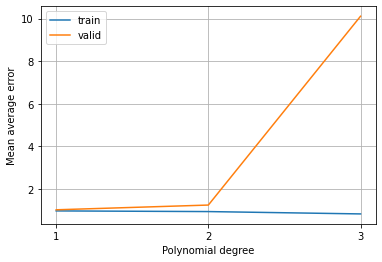

In [16]:
plt.grid()
plt.xlabel('Polynomial degree')
plt.ylabel('Mean average error')
plt.xticks(degrees)
plt.plot(degrees,v_train_scores.mean(axis=1),label='train')
plt.plot(degrees,v_valid_scores.mean(axis=1),label='valid')
plt.legend()

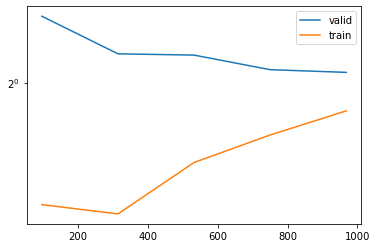

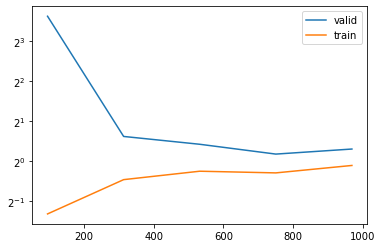

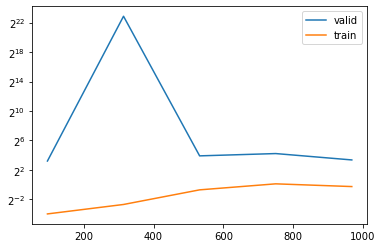

In [17]:
for d in degrees:
    pipe = Pipeline([('pf', PolynomialFeatures(d)),('lr', LinearRegression())])
    train_sizes, train_scores, valid_scores = learning_curve(pipe, X_train, y_train, scoring=make_scorer(mean_absolute_error))
    pass
    plt.plot(train_sizes,valid_scores.mean(axis=1),label='valid')
    plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
    plt.yscale('log',base=2) 
    plt.legend()
    plt.show()

In [20]:
pipe = Pipeline([('pf', PolynomialFeatures(1)),('lr', LinearRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.0746778052845012

**Part 2:** Create an ML pipeline combining polynomial feature engineering, PCA dimentionality reduction, and Ridge regression. You should also center your data. You goal is to explore which parameters work best for your pipeline. To do this as efficiently as possible, it is recommended that you use the grid search cross validation functionality. 

In [47]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [48]:
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA()),('pf',PolynomialFeatures()),('rr',Ridge())])
parameters = {
    'pf__degree':[1,2,3]
}
grid = GridSearchCV(pipe,parameters)
grid.fit(X_train,y_train)
grid.cv_results_

{'mean_fit_time': array([0.00537133, 0.00688839, 0.02834558]),
 'std_fit_time': array([0.00189035, 0.00030038, 0.00052108]),
 'mean_score_time': array([0.00114517, 0.00154715, 0.00292611]),
 'std_score_time': array([1.13774525e-04, 1.82076883e-05, 1.55346931e-04]),
 'param_pf__degree': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'pf__degree': 1}, {'pf__degree': 2}, {'pf__degree': 3}],
 'split0_test_score': array([ 0.26046313, -2.14396491, -4.92550213]),
 'split1_test_score': array([0.21882786, 0.30572307, 0.14058532]),
 'split2_test_score': array([ 0.20672905,  0.19419908, -0.41875077]),
 'split3_test_score': array([-0.17121459, -0.06125443, -0.11016701]),
 'split4_test_score': array([ 0.32505118,  0.21058846, -2.58659514]),
 'mean_test_score': array([ 0.16797133, -0.29894175, -1.58008595]),
 'std_test_score': array([0.17456486, 0.93048742, 1.93261175]),
 'rank_test_score': array([1, 2, 3], dtyp

In [49]:
y_pred = grid.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.070816106121143

**Part 3:** Do it all over again, but now explore different models. You need not explore all of them, but you should try at least one non-parametric model, one non-linear model, and one ensemble model.

In [63]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [57]:
pipe1 = Pipeline([('scaler', StandardScaler()),('pca',PCA()),('pf',PolynomialFeatures()),('hr', DummyRegressor())])
parameters = {
    'pf__degree':[1,2,3]
}
grid = GridSearchCV(pipe1,parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.5855203474787307

In [58]:
pipe2 = Pipeline([('scaler', StandardScaler()),('pca',PCA()),('pf',PolynomialFeatures()),('knr', KNeighborsRegressor())])
parameters = {
    'pf__degree':[1,2,3]
}
grid = GridSearchCV(pipe2,parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.182

In [59]:
pipe3 = Pipeline([('scaler', StandardScaler()),('pca',PCA()),('pf',PolynomialFeatures()),('dtr', DecisionTreeRegressor())])
parameters = {
    'pf__degree':[1,2,3]
}
grid = GridSearchCV(pipe3,parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.4933516838183762

In [60]:
pipe4 = Pipeline([('scaler', StandardScaler()),('pca',PCA()),('pf',PolynomialFeatures()),('svr', SVR())])
parameters = {
    'pf__degree':[1,2,3]
}
grid = GridSearchCV(pipe4,parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.2333412901813696

**Conclusion:** In the end, Ridge Regression (from part 2) was the best at a MAE of 1.0708!
